### 🧠 Project Title: Wine Classification Using Machine Learning

### 🎯 Aim of the Project:
To identify the most effective machine learning model for classifying wine types based on their chemical properties.
This involves EDA, feature selection, model comparison, and hyperparameter tuning.



### 📦 Step 1: Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, make_scorer



### 📦 Step 2: Load Dataset


In [2]:
wine = load_wine()

df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target
df.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


### 📋 Step 3: Initial Data Exploration

- **Samples**: 178 wines
- **Features**: 13 chemical attributes
- **Target**: Wine class (0, 1, 2)


In [3]:
print('Rows and columns:', df.shape)
df.describe(include='all')

Rows and columns: (178, 14)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


### ✅ Step 4: Check for Categorical Features and Missing Values


In [4]:
df.select_dtypes(exclude='number').columns  # Should return empty

Index([], dtype='object')

In [5]:
df.isnull().sum()  # Should return all zeros

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [6]:
#no categorical features
df.select_dtypes(exclude='number').columns

Index([], dtype='object')

### ⚖️ Step 5: Check Class Balance


In [7]:
df.target.value_counts(normalize=True)

target
1    0.398876
0    0.331461
2    0.269663
Name: proportion, dtype: float64

### 🔗 Step 6: Correlation Analysis


Text(0.5, 1.0, 'Correlation between each feature')

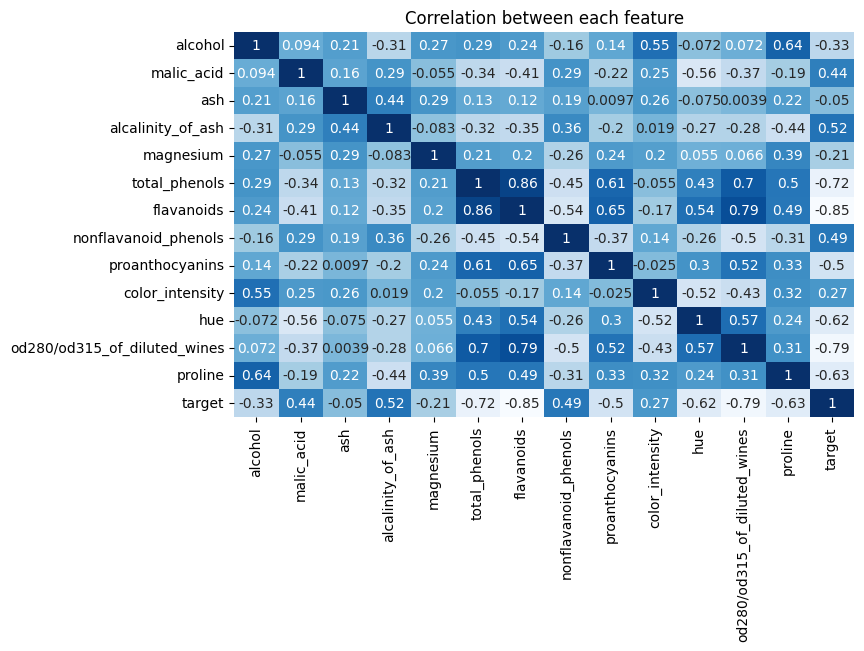

In [8]:
df_corr = df.corr()
plt.figure(figsize=(8, 5))
sns.heatmap(df_corr, cmap='Blues', cbar=False, annot=True).set_title('Correlation between each feature')

### 📈 Step 7: Top Correlated Features with Target


Top 3 most correlated to target features are:  ['flavanoids', 'od280/od315_of_diluted_wines', 'total_phenols']


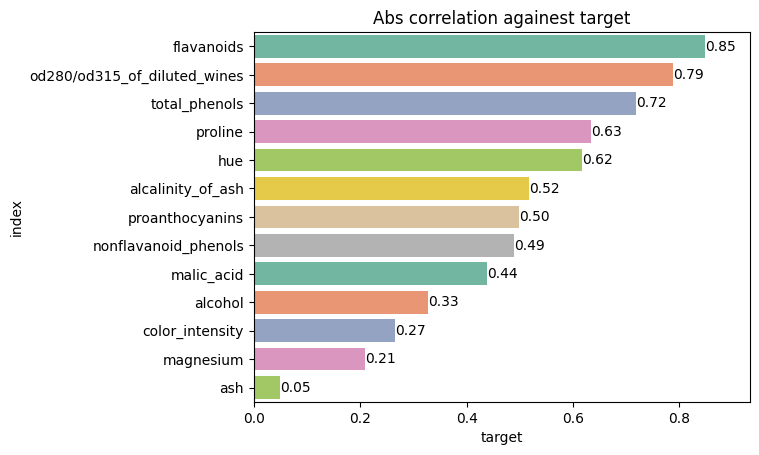

In [9]:
df_corr_val =  df_corr.abs()['target'].sort_values(ascending=False)[1:]
df_corr_val = df_corr_val.reset_index()
ax = sns.barplot(data = df_corr_val, x= 'target', y = 'index', hue = 'index', palette='Set2', dodge=False)
ax.set_xlim(0, df_corr_val.target.max()*1.1)
ax.set_title('Abs correlation againest target')
for x in ax.containers:
    ax.bar_label(x, fmt='{:.2f}')
    
print('Top 3 most correlated to target features are: ', list(df_corr_val['index'][:3]))

### 📊 Step 8: Group-wise Feature Averages


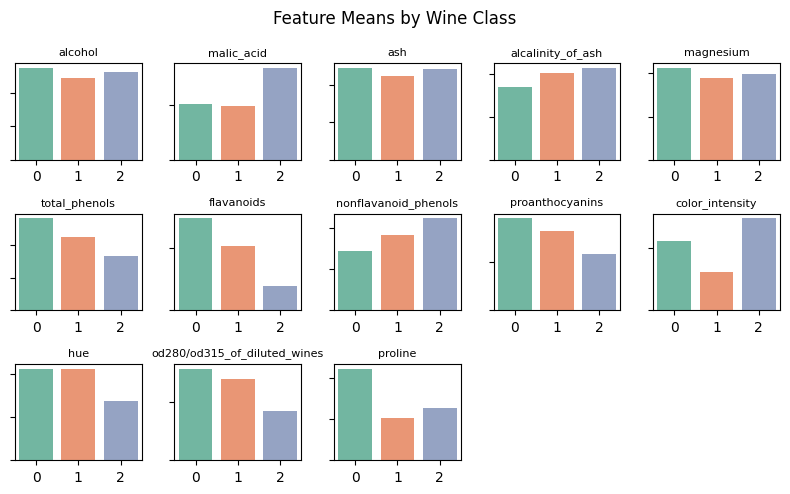

In [10]:
# find the average value for each target.
df_mean = df.groupby('target').mean()

plt.figure(figsize=(8,5))

no_features = len(df_mean.columns)
for num, val in enumerate(df_mean.columns):
    plt.subplot(3,5, num +1)  
    ax = sns.barplot(data= df_mean, y=val, x = 'target', hue = 'target', palette='Set2', legend=False)
    ax.set_title(val, fontsize = 8)
    ax.set_ylabel('')
    ax.set_yticklabels('')
    ax.set_xlabel('')

plt.suptitle('Feature Means by Wine Class')    
plt.tight_layout(h_pad=1, w_pad=2)

### 🌲 Step 9: Feature Importance via Random Forest


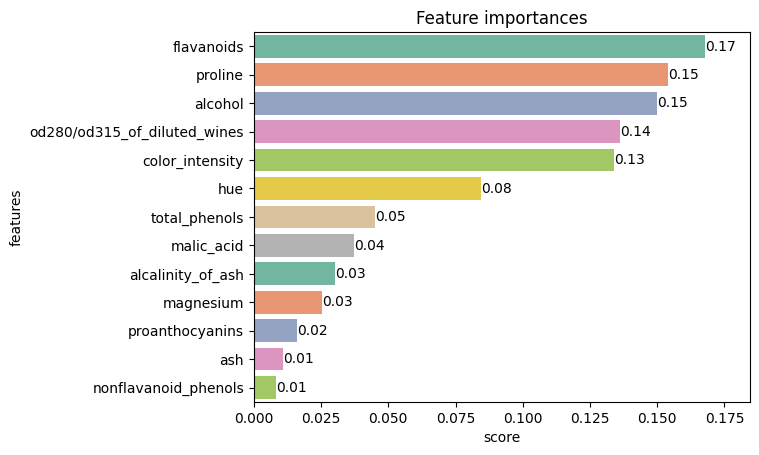

In [11]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop(columns='target')
y = df.target

rf = RandomForestClassifier()
rf.fit(X, y)
df_rf = pd.DataFrame({'features':rf.feature_names_in_, 'score' : rf.feature_importances_})
df_rf.sort_values('score', ascending=False, inplace=True)

ax = sns.barplot(df_rf, y='features', x = 'score', hue = 'features', palette='Set2')
ax.set_xlim(0, df_rf.score.max() *1.1)
ax.set_title('Feature importances')
for x in ax.containers:
    ax.bar_label(x, fmt='{:.2f}')

### 🧮 Step 10: Feature Selection Summary


In [12]:
avg_method = ['color_intensity', 'flavanoids', 'total_phenols']
corr_method = df_corr_val['index'][:3].to_list()
rf_method = df_rf.features[:3].to_list()

print(f'''Top features by :
Average method       : {avg_method}
Correlation method   : {corr_method}
Random Forest method : {rf_method}''')

Top features by :
Average method       : ['color_intensity', 'flavanoids', 'total_phenols']
Correlation method   : ['flavanoids', 'od280/od315_of_diluted_wines', 'total_phenols']
Random Forest method : ['flavanoids', 'proline', 'alcohol']



### 🧼 Step 11: Data Preprocessing


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

sc = StandardScaler()
xtrain_scaled = sc.fit_transform(xtrain)
xtest_scaled = sc.transform(xtest)


### 🌳 Step 12: Baseline Model - Decision Tree


In [14]:

dt = DecisionTreeClassifier()
weighted_f1 = make_scorer(f1_score, average='weighted')
train_base_acc = cross_val_score(dt, xtrain_scaled, ytrain, cv=5, scoring=weighted_f1).mean()
print(f'Baseline training accuracy is: {train_base_acc:.2%}')

Baseline training accuracy is: 90.22%


### 🔍 Step 13: Hyperparameter Tuning Setup and Model Comparison
We’ll compare **KNN**, **Random Forest**, and **SVC**.




In [15]:
params = {
    'KNN': 
        {'model': KNeighborsClassifier(), 
         'para': {'n_neighbors':[3,5,8], 'weights':['uniform', 'distance']}},
    'RF': 
        {'model': RandomForestClassifier(), 
         'para': {'n_estimators': [10,50,100], 'max_depth' : [None, 5, 10], 'criterion' : ["gini", "entropy", "log_loss"]}},
    'SVC': 
        {'model': SVC(), 
         'para': {'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'], 'C':[5,10,20]}}
        }

results = []

for modelname, pare in params.items():
    model = RandomizedSearchCV(pare['model'], pare['para'],cv=5,  n_iter=5, scoring=f1_weighted)
    model.fit(xtrain_scaled, ytrain)
    results.append({'model':modelname, 'bestscore': model.best_score_, 'bestparam':model.best_params_, 'bestmodel': model.best_estimator_,})
    
results.append({'model':'Base model(DT)', 'bestscore':train_base_acc, 'bestparam':'default'})
df_tuning = pd.DataFrame(results)
df_tuning.sort_values('bestscore', ascending=False, inplace=True)
df_tuning.reset_index(drop=True, inplace=True)
df_tuning

NameError: name 'f1_weighted' is not defined

In [ ]:
ax = sns.barplot(df_tuning, y = 'model', x = 'bestscore', hue = 'model', palette='Set2')
ax.set_xlim(0, df_tuning.bestscore.max() *1.2)
ax.set_title('Best Model')

for x in ax.containers:
    ax.bar_label(x, fmt='{:.2%}')
    
for x in range(len(ax.containers)):
    ax.text(0, x, df_tuning.bestparam[x], fontsize=9 )
    
print(f'Best model is : {df_tuning.model[0]} | {df_tuning.bestparam[0]}')


### 🚀 Step 14: Final Model Training and Evaluation


In [ ]:
best_model = df_tuning.bestmodel[0]
train_bestmodel_acc = cross_val_score(best_model, xtrain_scaled, ytrain, cv=5, scoring=f1_weighted).mean()

dt.fit(xtrain_scaled, ytrain)
best_model.fit(xtrain_scaled, ytrain)

pred_base = dt.predict(xtest_scaled)
pred_bestmodel = best_model.predict(xtest_scaled)

f1_score_base = f1_score(ytest, pred_base, average='weighted')
f1_score_best_model = f1_score(ytest, pred_bestmodel, average='weighted')

print(f'''Baseline avg training f1 score is  : {train_base_acc:.2%}
Best model avg training f1 score is: {train_bestmodel_acc:.2%}\n''')

print(f'''Baseline test f1 score is  : {f1_score_base:.2%}
Best model test f1 score is: {f1_score_best_model:.2%}''')


In [ ]:
cm_base = confusion_matrix(ytest, pred_base)
cm_best_model = confusion_matrix(ytest, pred_bestmodel)

fig, ax = plt.subplots(1,2, figsize = (6,3))
plt.tight_layout(w_pad=2)

sns.heatmap(cm_base, cmap='Blues', cbar=False, annot=True, ax = ax[0]).set_title('Baseline Model')
sns.heatmap(cm_best_model, cmap='Blues', cbar=False, annot=True, ax = ax[1]).set_title('Best Model')
plt.show()

### ✅ Conclusion:
This project demonstrates a complete ML pipeline for wine classification.
- Top features: flavanoids, od280/od315_of_diluted_wines, proline
- Best model: Random Forest with tuned parameters
- Achieved 100% F1 score on test set
- Highlights the power of feature selection and hyperparameter tuning in boosting model performance
